# Rasa API Demo

Hi there 🤖
Thanks for trying out our new Rasa API and CLI! 
We are super stocked to get your feedback! Please add any bugs, suggestions and so on to 
https://github.com/RasaHQ/rasa_stack/issues/10 .

Thanks 🎉🔥

## Rasa Project Setup

Run `rasa init` in the current directory to create an initial Rasa project 🎉

## Rasa Stack

* To test it I used the `rasa init` command in my terminal in the same folder of this `jupyter-notebook` and everything worked fine.

In [17]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"

### Train

In [28]:
import rasa

model_path = rasa.train(domain, config, [training_files], output)

Core configuration did not change. No need to retrain Core model.
NLU configuration did not change. No need to retrain NLU model.
Nothing changed. You can use the old model: 'models/20190328-211709.tar.gz'.


In [29]:
rasa.train??

### Chat with the Bot

In [30]:
from rasa.jupyter import chat
chat(model_path)

INFO:tensorflow:Restoring parameters from /tmp/tmp7vrtspp1/tmp3samri3f/nlu/component_5_EmbeddingIntentClassifier.ckpt
Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
fine
Here is something to cheer you up:


Did that help you?
yes
hello
hey
bot, are you there?
:/
/stop


### Test

In [31]:
import rasa.data as data
stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)

When I used the command below, the matrix did not appear, it only appears after I changed the `config.yml` file. I saw this warning in the logs:

```
2019-03-28 20:39:09 WARNING  rasa_nlu.config  - You have specified the pipeline template 'tensorflow_embedding' which has been renamed to 'supervised_embeddings'. Please update your code as it will no longer work with future versions of Rasa NLU.
```

And I changed `tensorflow_embedding` to `supervised_embeddings` in the `config.yml`

INFO:tensorflow:Restoring parameters from /tmp/tmpzulol8ld/tmp3samri3f/nlu/component_5_EmbeddingIntentClassifier.ckpt


100%|██████████| 4/4 [00:00<00:00, 17.11it/s]
/home/arthur/.virtualenvs/all/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/arthur/.virtualenvs/all/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


INFO:tensorflow:Restoring parameters from /tmp/tmpcxcp3izh/tmp3samri3f/nlu/component_5_EmbeddingIntentClassifier.ckpt


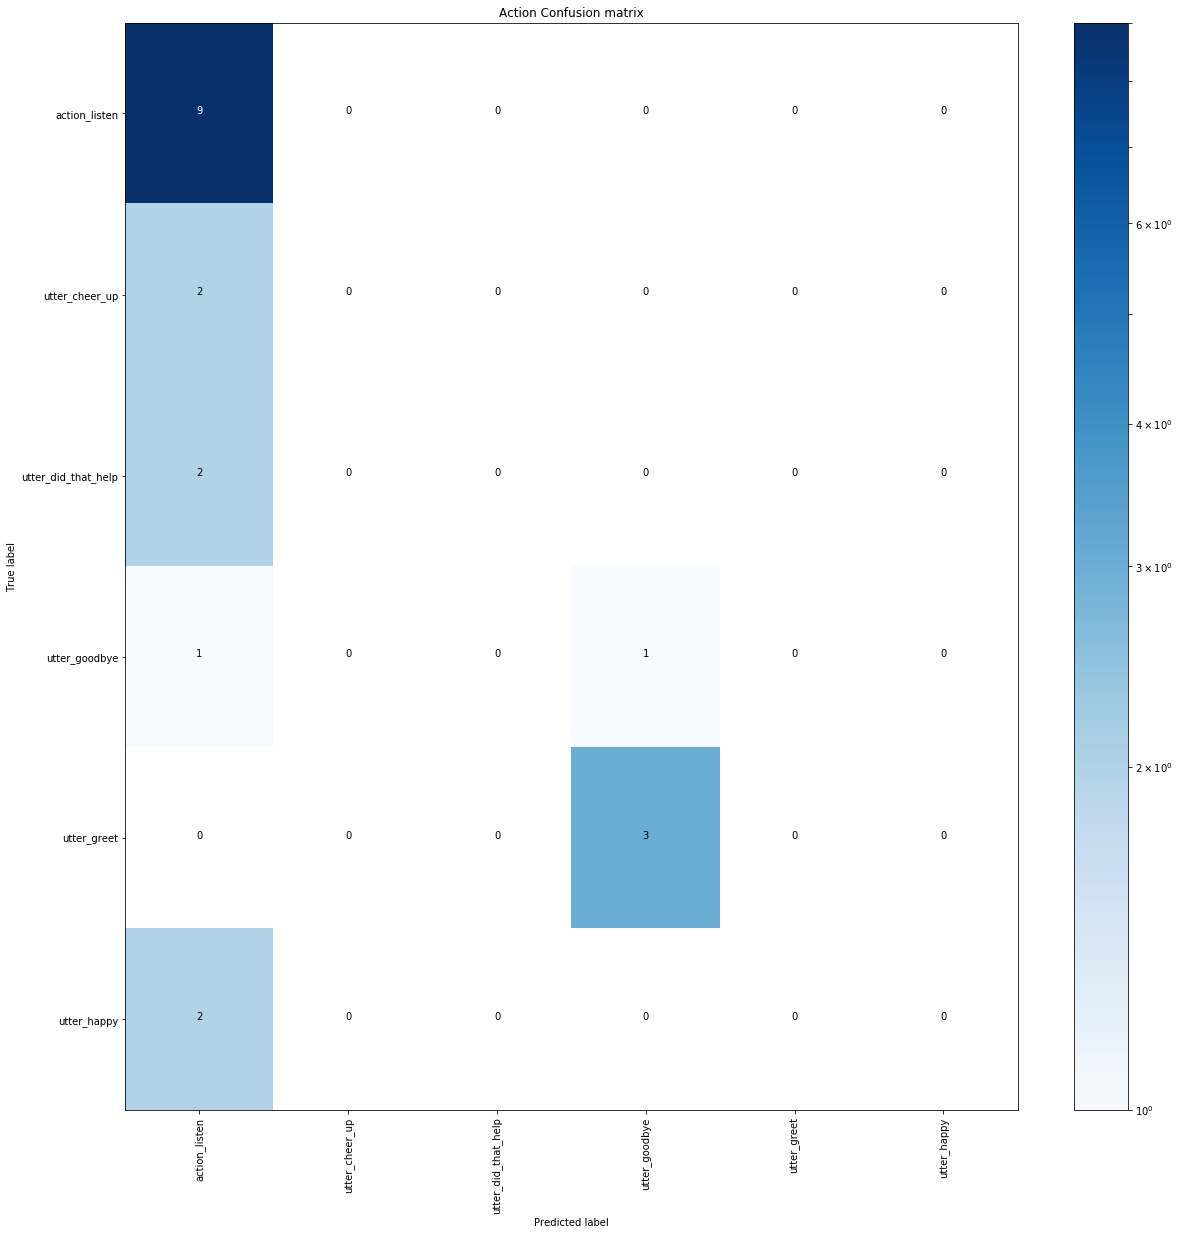

In [32]:
rasa.test(model_path, stories_directory, nlu_data_directory)

In [33]:
!ls results

failed_stories.md  story_confmat.pdf


In [34]:
!cat results/failed_stories.md

## happy path
* None
    - utter_greet   <!-- predicted: utter_goodbye -->
* None
    - utter_happy   <!-- predicted: action_listen -->


## sad path 1
* None
    - utter_greet   <!-- predicted: utter_goodbye -->
* None
    - utter_cheer_up   <!-- predicted: action_listen -->
    - utter_did_that_help   <!-- predicted: action_listen -->
* None
    - utter_happy   <!-- predicted: action_listen -->


## sad path 2
* None
    - utter_greet   <!-- predicted: utter_goodbye -->
* None
    - utter_cheer_up   <!-- predicted: action_listen -->
    - utter_did_that_help   <!-- predicted: action_listen -->
* None
    - utter_goodbye   <!-- predicted: action_listen -->




Seems like the Rasa moodbot have some troubles :/

Maybe remove these issues from moodbot will be good to new users to learn with a good rasa chatbot example.

## Rasa Core API

### Train

In [35]:
import rasa_core

agent = rasa_core.train(domain_file=domain, policy_config=config, stories_file=stories_directory, output_path=output)

Processed Story Blocks: 100%|██████████| 4/4 [00:00<00:00, 501.58it/s, # trackers=7]
Processed actions: 62it [00:00, 806.21it/s, # examples=62]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 18)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6528      
_________________________________________________________________
dense (Dense)                (None, 12)                396       
_________________________________________________________________
activation (Activation)      (None, 12)                0         
Total params: 6,924
Trainable params: 6,924
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
62/62 [==============================] - 0s 8ms/sample - loss: 2.4845 - acc: 0.1129
Epoch 2/100
62/62 [==============================] - 0s 290us/sample - loss: 2.4401 - acc: 0.3548
Epoch 3/100
62/62 [==============================] - 0s 294us/sample - loss: 2

62/62 [==============================] - 0s 204us/sample - loss: 1.2300 - acc: 0.5000
Epoch 76/100
62/62 [==============================] - 0s 233us/sample - loss: 1.2433 - acc: 0.4677
Epoch 77/100
62/62 [==============================] - 0s 243us/sample - loss: 1.2246 - acc: 0.4677
Epoch 78/100
62/62 [==============================] - 0s 212us/sample - loss: 1.1991 - acc: 0.4839
Epoch 79/100
62/62 [==============================] - 0s 144us/sample - loss: 1.1851 - acc: 0.4677
Epoch 80/100
62/62 [==============================] - 0s 185us/sample - loss: 1.1838 - acc: 0.4839
Epoch 81/100
62/62 [==============================] - 0s 321us/sample - loss: 1.1726 - acc: 0.4839
Epoch 82/100
62/62 [==============================] - 0s 157us/sample - loss: 1.1912 - acc: 0.4839
Epoch 83/100
62/62 [==============================] - 0s 150us/sample - loss: 1.1658 - acc: 0.5000
Epoch 84/100
62/62 [==============================] - 0s 167us/sample - loss: 1.1241 - acc: 0.5161
Epoch 85/100
62/62 [===

### Test

I didn't find documentation about the `rasa_core.test` what is the difference between this command and Rasa `e2e` tests?

In [11]:
rasa_core.test(stories_directory, agent)

100%|██████████| 4/4 [00:00<00:00, 22.30it/s]


{'report': '                     precision    recall  f1-score   support\n\n      action_listen       1.00      1.00      1.00         9\n     utter_cheer_up       1.00      1.00      1.00         2\nutter_did_that_help       1.00      1.00      1.00         2\n      utter_goodbye       1.00      1.00      1.00         2\n        utter_greet       1.00      1.00      1.00         3\n        utter_happy       1.00      1.00      1.00         2\n\n          micro avg       1.00      1.00      1.00        20\n          macro avg       1.00      1.00      1.00        20\n       weighted avg       1.00      1.00      1.00        20\n',
 'precision': 1.0,
 'f1': 1.0,
 'accuracy': 1.0,
 'actions': [{'action': 'utter_greet',
   'predicted': 'utter_greet',
   'policy': 'policy_0_MemoizationPolicy',
   'confidence': 1.0},
  {'action': 'action_listen',
   'predicted': 'action_listen',
   'policy': 'policy_0_MemoizationPolicy',
   'confidence': 1.0},
  {'action': 'utter_happy',
   'predicted': 'ut

## Rasa NLU API

### Train

In [36]:
import rasa_nlu

nlu_model_path = "nlu_model"
_, interpreter, nlu_model_path = rasa_nlu.train(nlu_config=config, data=nlu_data_directory, path=nlu_model_path)

Epochs: 100%|██████████| 300/300 [00:01<00:00, 152.03it/s, loss=0.091, acc=1.000]


In [38]:
rasa_nlu.train??

### Test

I really miss the output like `pytest` with green colors indicating **OK** and red colors meaning **FAIL**, it's hard to understand logs from tests like this.

In [39]:
rasa_nlu.test(nlu_data_directory, nlu_model_path)

INFO:tensorflow:Restoring parameters from /home/arthur/Documents/rasa-stack/api/nlu_model/default/model_20190328-211846/component_5_EmbeddingIntentClassifier.ckpt


{'intent_evaluation': {'predictions': [{'text': 'hey',
    'intent': 'greet',
    'predicted': 'greet',
    'confidence': 0.9702897071838379},
   {'text': 'hello',
    'intent': 'greet',
    'predicted': 'greet',
    'confidence': 0.9653896689414978},
   {'text': 'hi',
    'intent': 'greet',
    'predicted': 'greet',
    'confidence': 0.9659559726715088},
   {'text': 'good morning',
    'intent': 'greet',
    'predicted': 'greet',
    'confidence': 0.9626706838607788},
   {'text': 'good evening',
    'intent': 'greet',
    'predicted': 'greet',
    'confidence': 0.9556833505630493},
   {'text': 'hey there',
    'intent': 'greet',
    'predicted': 'greet',
    'confidence': 0.9704550504684448},
   {'text': 'bye',
    'intent': 'goodbye',
    'predicted': 'goodbye',
    'confidence': 0.9511460065841675},
   {'text': 'goodbye',
    'intent': 'goodbye',
    'predicted': 'goodbye',
    'confidence': 0.9618847370147705},
   {'text': 'see you around',
    'intent': 'goodbye',
    'predicted':

## Speak to separately trained models

I did not understand the difference from this chat and the other one, what means "Speak to separately trained models"?

In [40]:
from rasa.jupyter import chat

chat(agent=agent, interpreter=interpreter)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
fine, and you?
bot?
hi
bye
fine
/stop


## My opinion

* I really really liked the `rasa init`, it will bring Rasa to a new level and short the path to building good Chatbots

* Tests are crucial to guarantee that the chatbot behavior remains even after changes in the content and models, have tests in the rasa_nlu and rasa_core layers are awesome features to bring more data in the chatbot development

* I did not like the way that the tests outputs are given, it's hard to understand and find issues, maybe some `green` and `red` colors can make this easier. A different way with fewer data to new developers and a verbose output with all the data will be good to all kind of Rasa users.